In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [2]:
# Import Data
loans = pd.read_csv('./loan.csv')
loans.head()

/home/borqs/pgmlai/tools/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
len(loans)

39717

In [4]:
loans.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [5]:
# Drop the columns which have NAs in all their rows
for col in loans.columns:
    if(loans[col].isnull().sum() == len(loans)):
        loans = loans.drop(columns=col)

In [6]:
len(loans.columns)

57

In [7]:
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
# Dropping columns that are not required for analysis and the ones that has same values across all rows
loans = loans.drop(columns=['url', 'desc', 'pymnt_plan', 'initial_list_status', 'application_type'])

In [9]:
len(loans.columns)

52

In [10]:
# Check if a member_id exists more than once in the dataset
loans[loans.duplicated(['member_id'])]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [11]:
# Other way of checking for duplicates
print(any(loans['member_id'].duplicated()))
print(any(loans['emp_title'].duplicated()))
print(any(loans['emp_length'].duplicated()))
print(any(loans['mths_since_last_delinq'].duplicated()))

False
True
True
True


In [49]:
loans['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [50]:
len(loans.loc[loans['loan_amnt'] != loans['funded_amnt']])

1849

In [51]:
len(loans.loc[loans['funded_amnt'] != loans['funded_amnt_inv']])

19842

In [52]:
loans['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

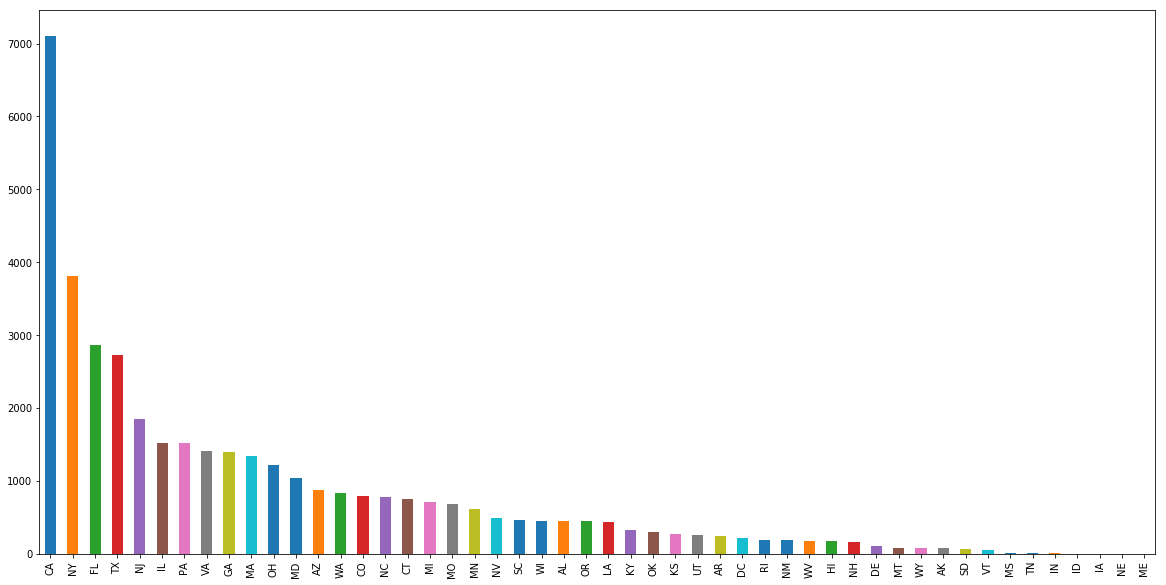

In [53]:
# Plot which states received more no. of loan applications
plt.figure(figsize=(20, 10))
loans['addr_state'].value_counts().plot.bar()
plt.show()

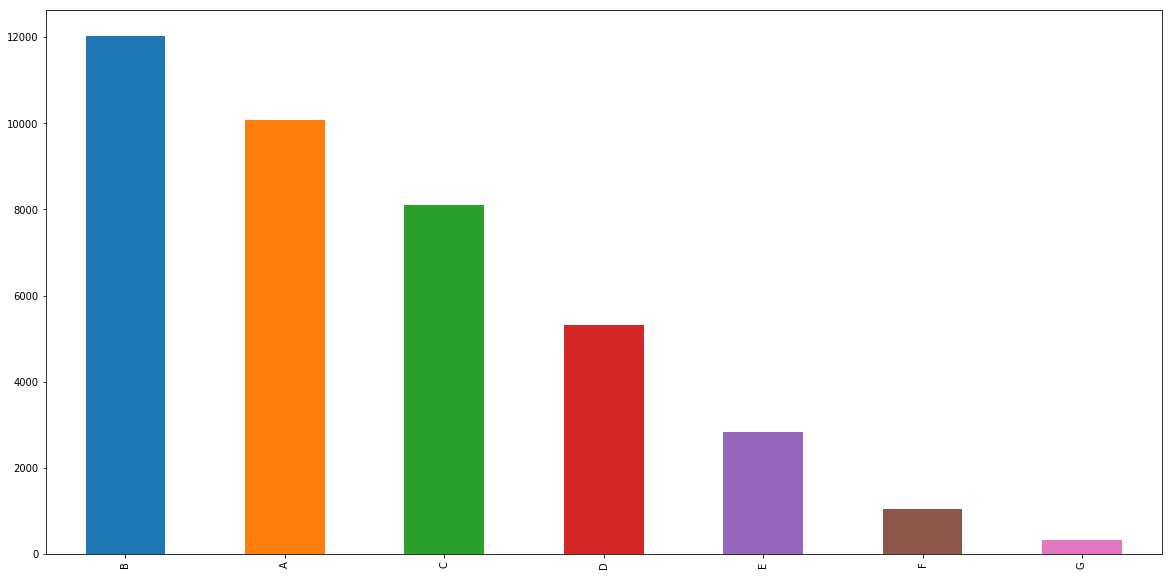

In [54]:
# Plot loan grades
plt.figure(figsize=(20, 10))
loans['grade'].value_counts().plot.bar()
plt.show()

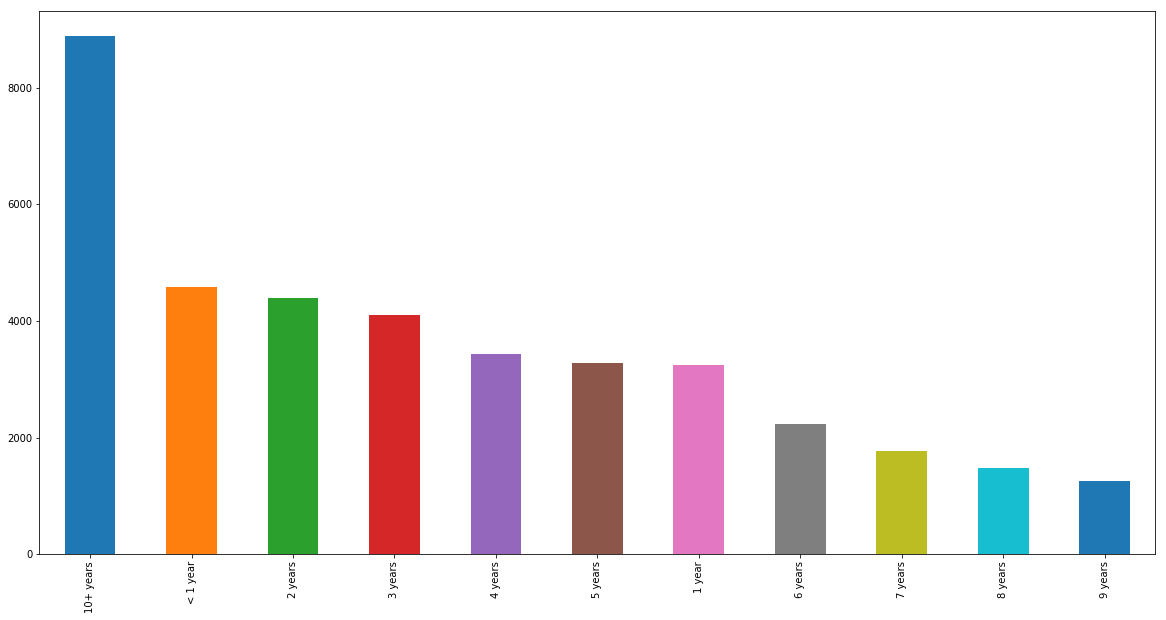

In [55]:
# Plot which emp_length received more no. of loan applications
plt.figure(figsize=(20, 10))
loans['emp_length'].value_counts().plot.bar()
plt.show()

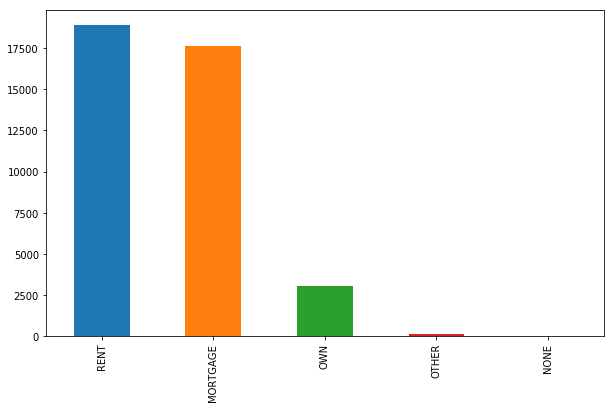

In [56]:
# Plot which home_ownership received more no. of loan applications
plt.figure(figsize=(10, 6))
loans['home_ownership'].value_counts().plot.bar()
plt.show()

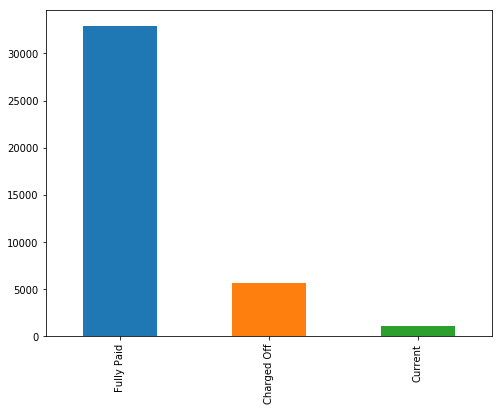

In [57]:
# Plot loan status
plt.figure(figsize=(8, 6))
loans['loan_status'].value_counts().plot.bar()
plt.show()

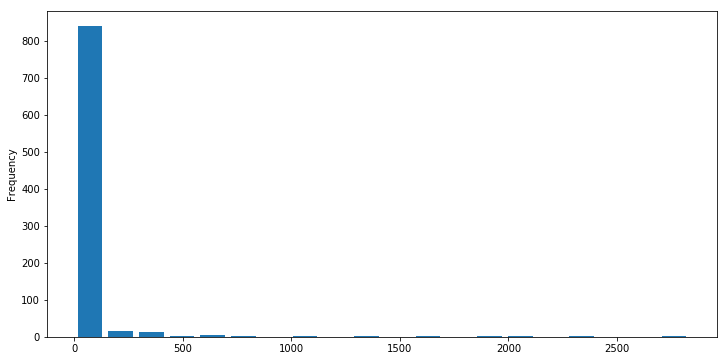

In [58]:
# Plot loan amount bins
plt.figure(figsize=(12, 6))
loans['loan_amnt'].value_counts().plot.hist(bins=20, rwidth=0.8)
plt.show()

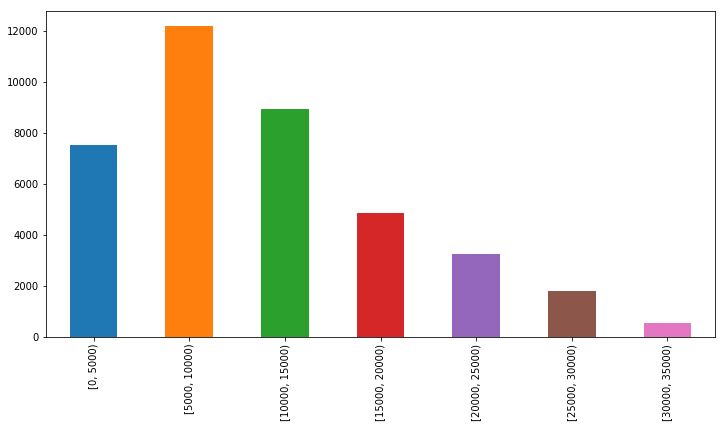

In [59]:
# Plot loan amount bins
plt.figure(figsize=(12, 6))
# out, bins = pd.cut(np.array(loans['loan_amnt']), bins=10, include_lowest=True, right=False, retbins=True)
bin_step = 5000
bin_range = np.arange(0, 36000, bin_step)
out, bins = pd.cut(np.array(loans['loan_amnt']), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()

plt.show()

In [60]:
loans.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,0.033426,-0.013359,0.122365,NaN,NaN,NaN,NaN,NaN,-0.009505,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,-0.008769,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.037180,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.042746,NaN
installment,0.086587,0.081025,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.118152,0.075467,0.401688,NaN,NaN,NaN,NaN,NaN,-0.034103,NaN
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.021589,0.015604,0.140401,NaN,NaN,NaN,NaN,NaN,-0.016801,NaN
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.024878,0.011033,0.005212,NaN,NaN,NaN,NaN,NaN,0.005691,NaN
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,0.012315,0.013912,-0.012149,NaN,NaN,NaN,NaN,NaN,0.003375,NaN
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,...,0.018972,0.012420,0.028514,NaN,NaN,NaN,NaN,NaN,0.016346,NaN


In [61]:
loans['dti'].corr(loans['annual_inc'])

-0.12273191020969614

In [62]:
loans['loan_amnt'].corr(loans['funded_amnt'])

0.9815782188237627

In [63]:
loans['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [65]:
loans['mths_since_last_delinq'].unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0.])

In [66]:
len(loans.columns)

52

In [67]:
loans.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_last_delinq        float64
mths_since_l

In [69]:
loans[['last_credit_pull_d', 'next_pymnt_d']].head()

,last_credit_pull_d,next_pymnt_d
0,May-16,NaN
1,Sep-13,NaN
2,May-16,NaN
3,Apr-16,NaN
4,May-16,Jun-16


In [71]:
loans['revol_util'].describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [111]:
loans['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [112]:
print(len(loans))
print(loans['revol_util'].isnull().sum())

39717
50


In [118]:
loans['revol_util'].str.contains('%').sum()

39667

In [125]:
is_string_dtype(loans['revol_util'])

True

# Univariate Analysis

## acc_now_delinq column

In [159]:
loans['acc_now_delinq'].isnull().sum()

0

In [160]:
loans['acc_now_delinq'].describe()

count    39717.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64

In [161]:
loans['acc_now_delinq'].unique()

array([0])

In [ ]:
# Only 0 value is present. Hence, we can drop this column.

## chargeoff_within_12_mths column

In [162]:
loans['chargeoff_within_12_mths'].isnull().sum()

56

In [163]:
loans['chargeoff_within_12_mths'].describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [164]:
loans['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [12]:
# Only 0 value is present with 56 'nan'. Hence, we can drop this column.

## delinq_amnt column

In [165]:
loans['delinq_amnt'].isnull().sum()

0

In [166]:
loans['delinq_amnt'].describe()

count    39717.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: delinq_amnt, dtype: float64

In [167]:
loans['delinq_amnt'].unique()

array([0])

In [13]:
# Only 0 value is present. Hence, we can drop this column.

### earliest_cr_line column
- Since it is date column, extracting month and year may be useful for further analysis

In [38]:
loans['earliest_cr_line'].isnull().sum()

0

In [39]:
loans['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [41]:
# Convert string to date
loans['earliest_cr_line'] = loans['earliest_cr_line'].apply(lambda x: datetime.datetime.strptime(x, '%b-%y'))

In [42]:
loans['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [43]:
# Extract Month
loans['earliest_cr_line_month'] = loans['earliest_cr_line'].apply(lambda x: datetime.datetime.strftime(x, '%b'))

In [44]:
# Extract Year
loans['earliest_cr_line_year'] = loans['earliest_cr_line'].apply(lambda x: int(datetime.datetime.strftime(x, '%Y')))

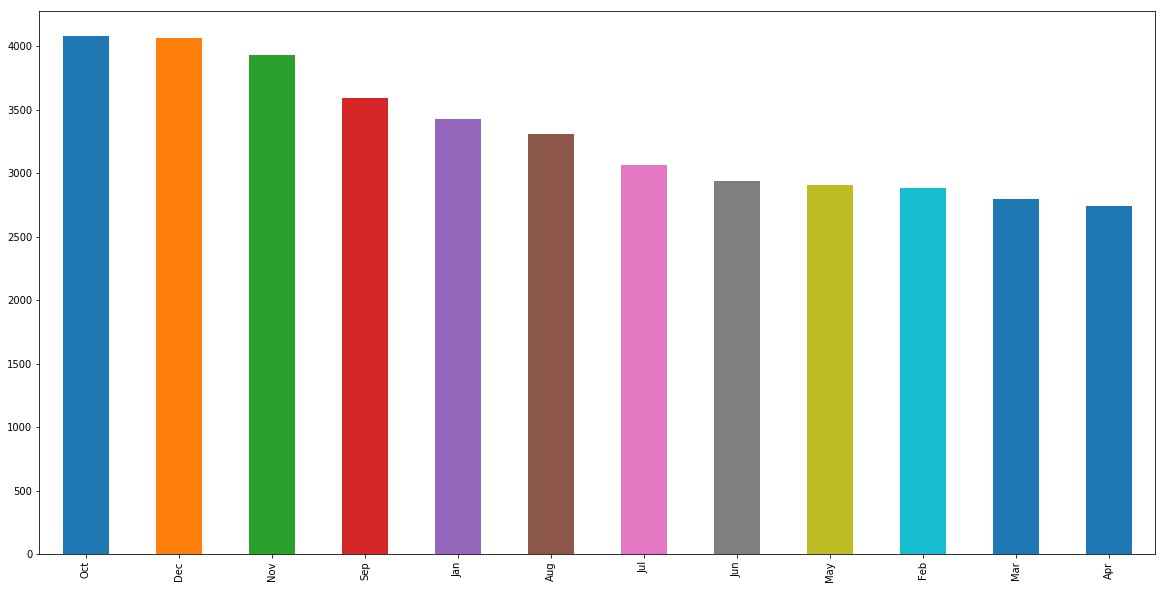

In [45]:
# Month Distribution Chart
plt.figure(figsize=(20, 10))
loans['earliest_cr_line_month'].value_counts().plot.bar()
plt.show()

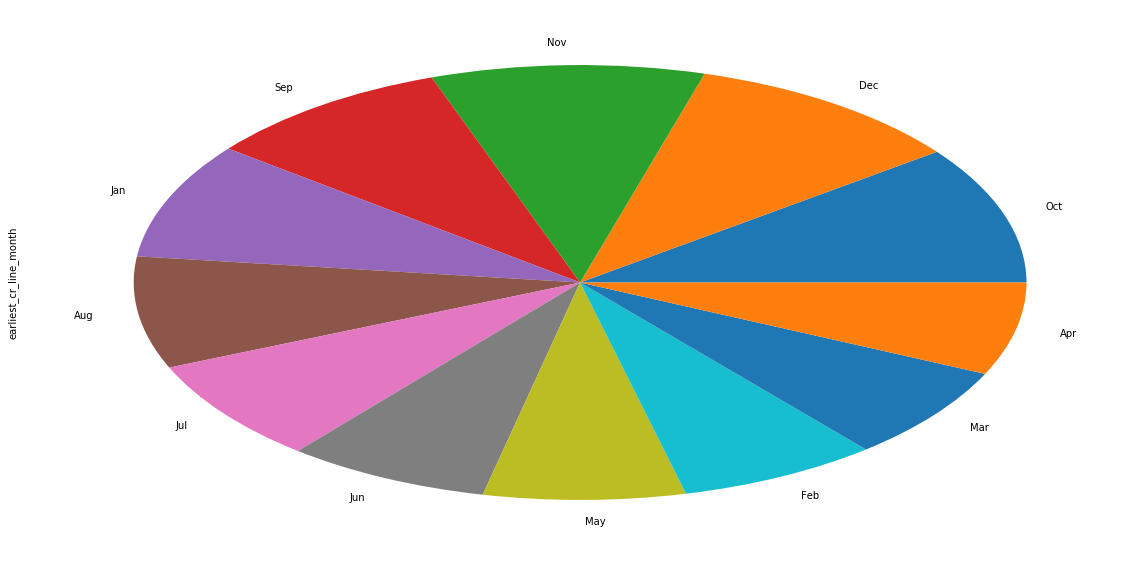

In [46]:
plt.figure(figsize=(20, 10))
loans['earliest_cr_line_month'].value_counts().plot.pie()
plt.show()

## Columns:
- revol_util
- total_rec_prncp
- total_rec_int
- total_pymnt
- total_pymnt_inv
- out_prncp_inv
- earliest_cr_line_year

### Distribution plots based upon range of values

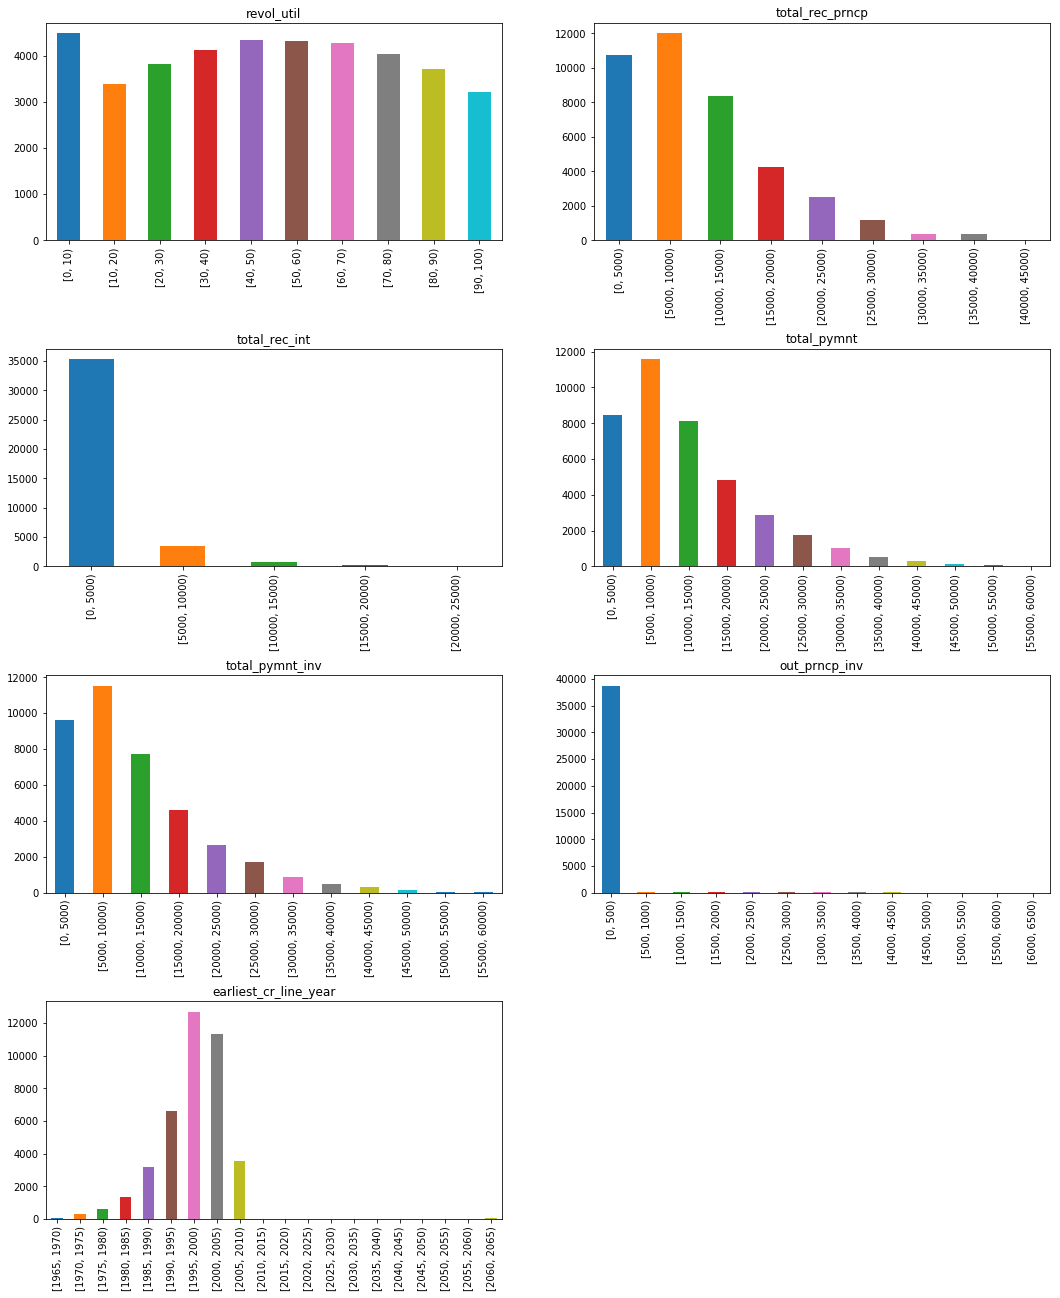

In [49]:
plt.figure(figsize=(18, 22))
plt.subplots_adjust(hspace=0.5)

# Subplot 1: revol_util
plt.subplot(4, 2, 1)
plt.title('revol_util')
bin_step = 10
bin_range = np.arange(0, 110, bin_step)
out, bins = pd.cut(np.array(loans['revol_util']), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()

# Subplot 2: total_rec_prncp
plt.subplot(4, 2, 2)
plt.title('total_rec_prncp')
bin_step = 5000
bin_range = np.arange(0, 50000, bin_step)
out, bins = pd.cut(np.array(loans['total_rec_prncp']), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()

# Subplot 3: total_rec_int
plt.subplot(4, 2, 3)
plt.title('total_rec_int')
bin_step = 5000
bin_range = np.arange(0, 30000, bin_step)
out, bins = pd.cut(np.array(loans['total_rec_int']), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()

# Subplot 4: total_pymnt
plt.subplot(4, 2, 4)
plt.title('total_pymnt')
bin_step = 5000
bin_range = np.arange(0, 65000, bin_step)
out, bins = pd.cut(np.array(loans['total_pymnt']), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()

# Subplot 5: total_pymnt
plt.subplot(4, 2, 5)
plt.title('total_pymnt_inv')
bin_step = 5000
bin_range = np.arange(0, 65000, bin_step)
out, bins = pd.cut(np.array(loans['total_pymnt_inv']), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()

# Subplot 6: out_prncp_inv
plt.subplot(4, 2, 6)
plt.title('out_prncp_inv')
bin_step = 500
bin_range = np.arange(0, 7000, bin_step)
out, bins = pd.cut(np.array(loans['out_prncp_inv']), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()

# Subplot 7: out_prncp_inv
plt.subplot(4, 2, 7)
plt.title('earliest_cr_line_year')
bin_step = 5
bin_range = np.arange(1965, 2070, bin_step)
out, bins = pd.cut(np.array(loans['earliest_cr_line_year']), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()

plt.show()

### Histogram

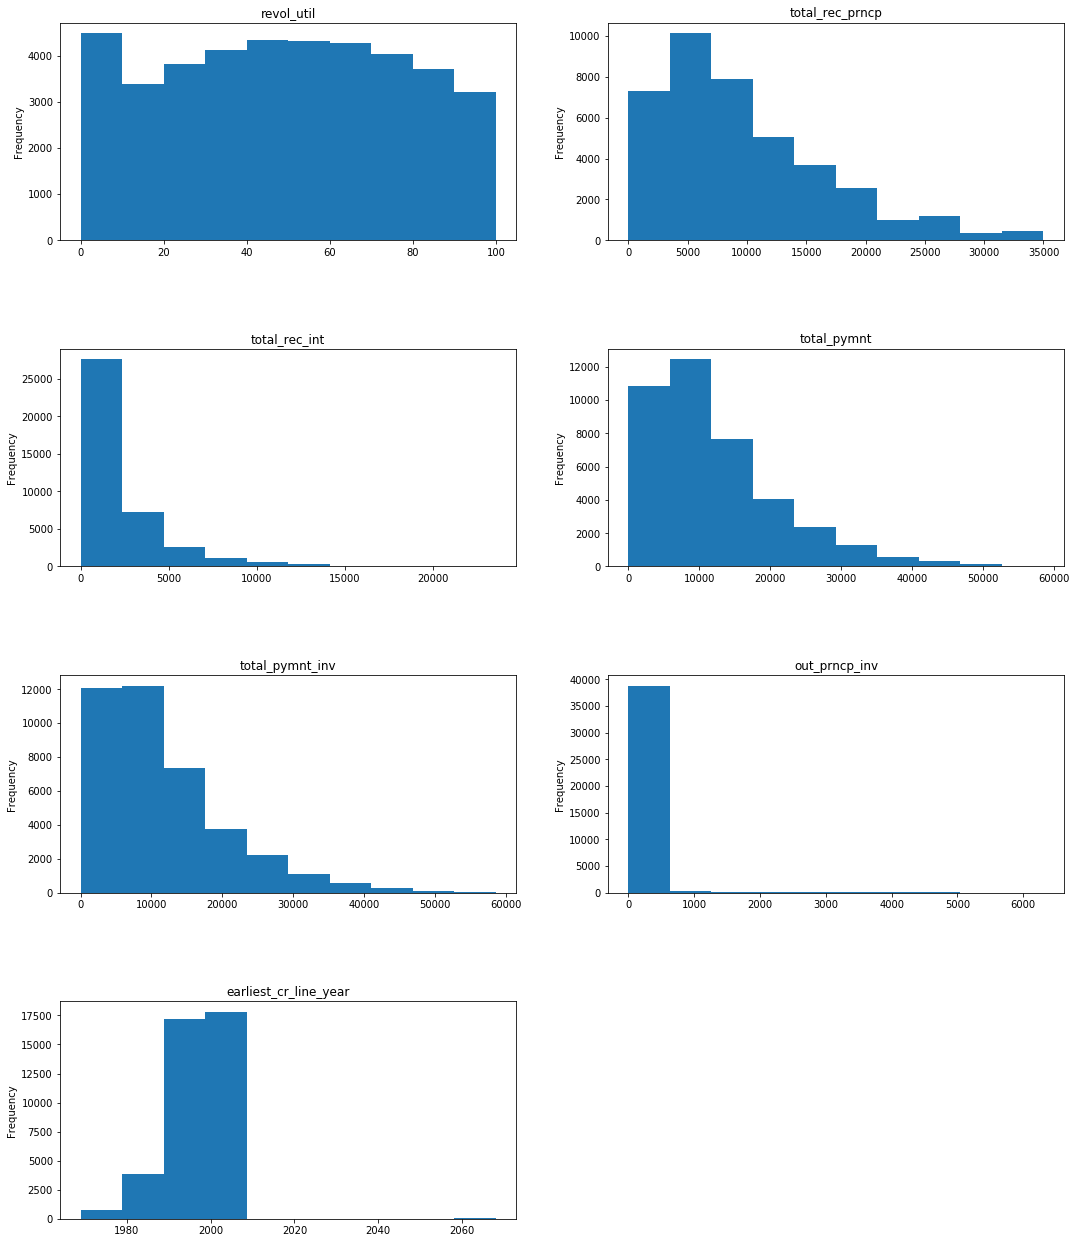

In [52]:
plt.figure(figsize=(18, 22))
plt.subplots_adjust(hspace=0.5)

# Subplot 1: revol_util
plt.subplot(4, 2, 1)
plt.title('revol_util')
loans['revol_util'].plot.hist()

# Subplot 2: total_rec_prncp
plt.subplot(4, 2, 2)
plt.title('total_rec_prncp')
loans['total_rec_prncp'].plot.hist()

# Subplot 3: total_rec_int
plt.subplot(4, 2, 3)
plt.title('total_rec_int')
loans['total_rec_int'].plot.hist()

# Subplot 4: total_pymnt
plt.subplot(4, 2, 4)
plt.title('total_pymnt')
loans['total_pymnt'].plot.hist()

# Subplot 5: total_pymnt
plt.subplot(4, 2, 5)
plt.title('total_pymnt_inv')
loans['total_pymnt_inv'].plot.hist()

# Subplot 6: out_prncp_inv
plt.subplot(4, 2, 6)
plt.title('out_prncp_inv')
loans['out_prncp_inv'].plot.hist()

# Subplot 6: earliest_cr_line_year
plt.subplot(4, 2, 7)
plt.title('earliest_cr_line_year')
loans['earliest_cr_line_year'].plot.hist()

plt.show()

### KDEPlots

/home/borqs/pgmlai/tools/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/borqs/pgmlai/tools/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/borqs/pgmlai/tools/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


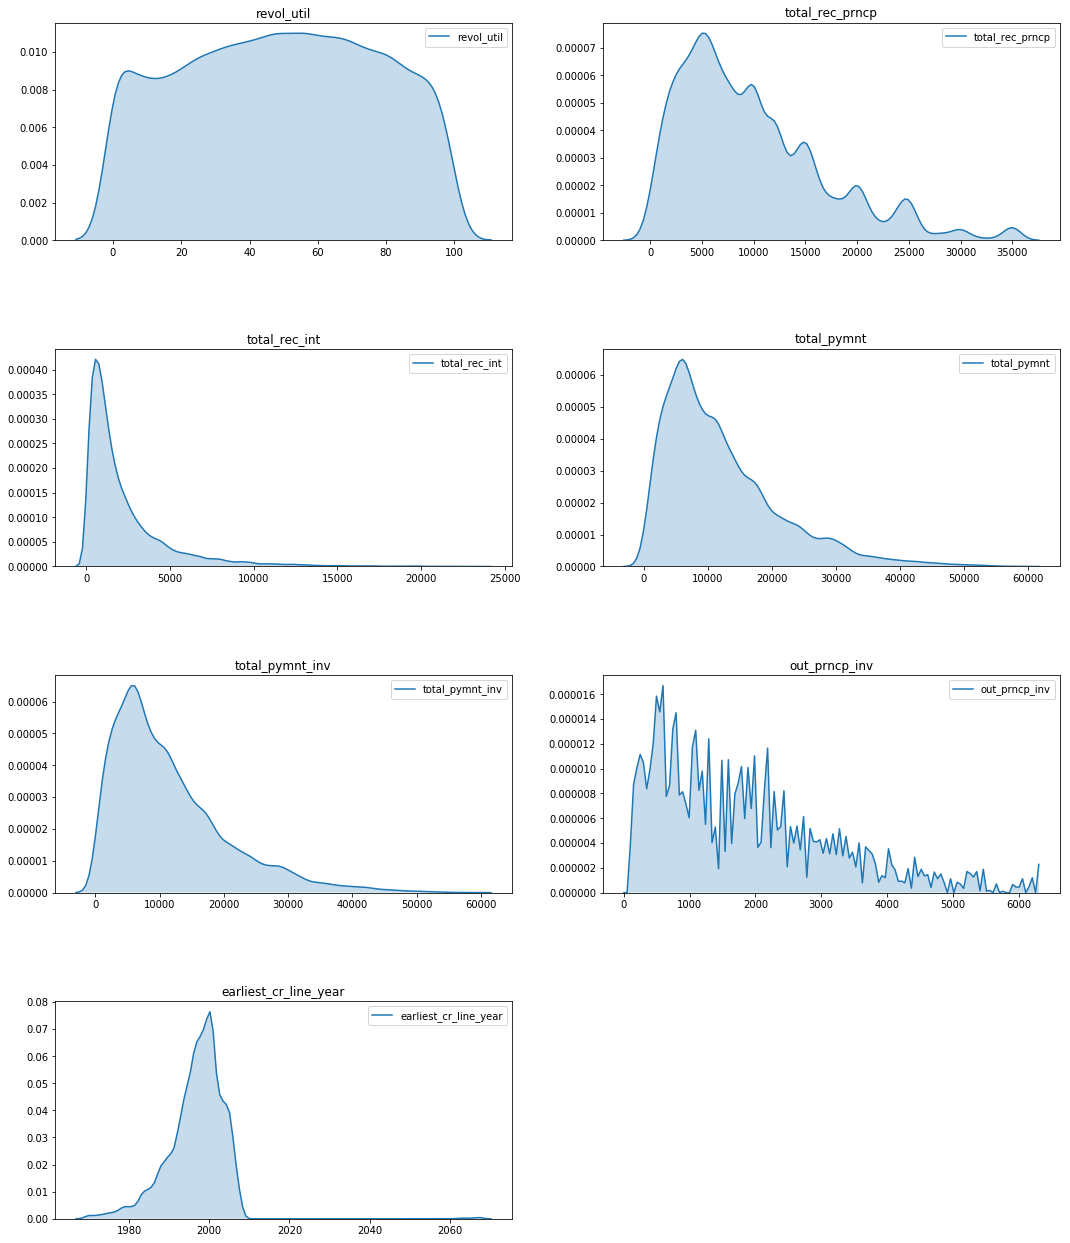

In [53]:
plt.figure(figsize=(18, 22))
plt.subplots_adjust(hspace=0.5)

# Subplot 1: revol_util
plt.subplot(4, 2, 1)
plt.title('revol_util')
sns.kdeplot(loans['revol_util'], shade = True)

# Subplot 2: total_rec_prncp
plt.subplot(4, 2, 2)
plt.title('total_rec_prncp')
sns.kdeplot(loans['total_rec_prncp'], shade = True)

# Subplot 3: total_rec_int
plt.subplot(4, 2, 3)
plt.title('total_rec_int')
sns.kdeplot(loans['total_rec_int'], shade = True)

# Subplot 4: total_pymnt
plt.subplot(4, 2, 4)
plt.title('total_pymnt')
sns.kdeplot(loans['total_pymnt'], shade = True)

# Subplot 5: total_pymnt
plt.subplot(4, 2, 5)
plt.title('total_pymnt_inv')
sns.kdeplot(loans['total_pymnt_inv'], shade = True)

# Subplot 6: out_prncp_inv
plt.subplot(4, 2, 6)
plt.title('out_prncp_inv')
sns.kdeplot(loans['out_prncp_inv'], shade = True)

# Subplot 7: earliest_cr_line_year
plt.subplot(4, 2, 7)
plt.title('earliest_cr_line_year')
sns.kdeplot(loans['earliest_cr_line_year'], shade = True)

plt.show()

### Box Plots for identifying range of values and outliers

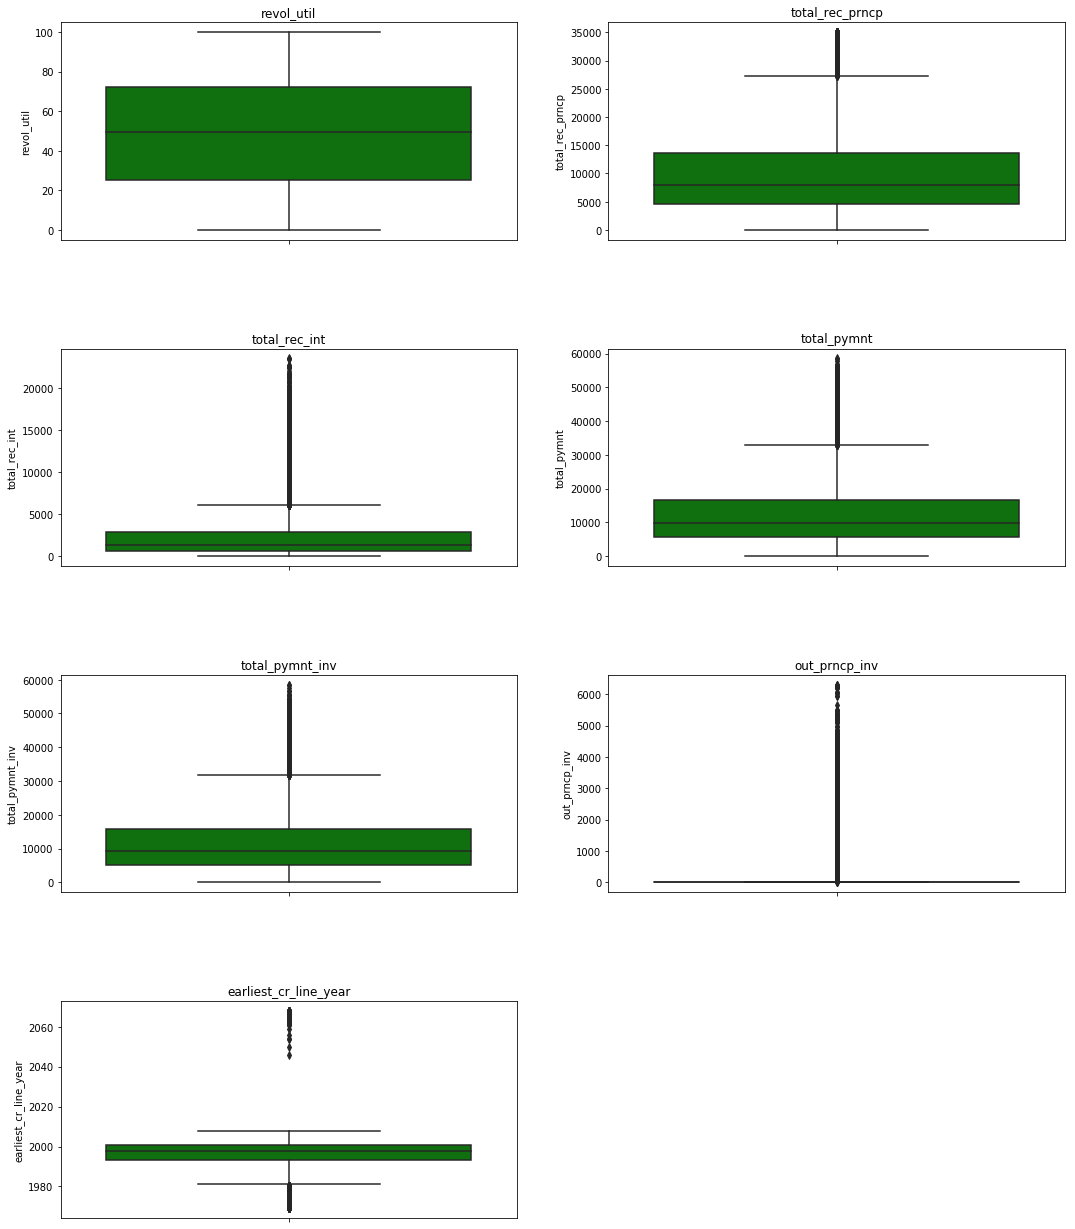

In [54]:
plt.figure(figsize=(18, 22))
plt.subplots_adjust(hspace=0.5)

# Subplot 1: revol_util
plt.subplot(4, 2, 1)
plt.title('revol_util')
sns.boxplot(loans['revol_util'], color = "green", orient = "v")

# Subplot 2: total_rec_prncp
plt.subplot(4, 2, 2)
plt.title('total_rec_prncp')
sns.boxplot(loans['total_rec_prncp'], color = "green", orient = "v")

# Subplot 3: total_rec_int
plt.subplot(4, 2, 3)
plt.title('total_rec_int')
sns.boxplot(loans['total_rec_int'], color = "green", orient = "v")

# Subplot 4: total_pymnt
plt.subplot(4, 2, 4)
plt.title('total_pymnt')
sns.boxplot(loans['total_pymnt'], color = "green", orient = "v")

# Subplot 5: total_pymnt
plt.subplot(4, 2, 5)
plt.title('total_pymnt_inv')
sns.boxplot(loans['total_pymnt_inv'], color = "green", orient = "v")

# Subplot 6: out_prncp_inv
plt.subplot(4, 2, 6)
plt.title('out_prncp_inv')
sns.boxplot(loans['out_prncp_inv'], color = "green", orient = "v")

# Subplot 7: earliest_cr_line_year
plt.subplot(4, 2, 7)
plt.title('earliest_cr_line_year')
sns.boxplot(loans['earliest_cr_line_year'], color = "green", orient = "v")

plt.show()

### Violin plots for a consolidated view of both range of values and their distribution

/home/borqs/pgmlai/tools/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


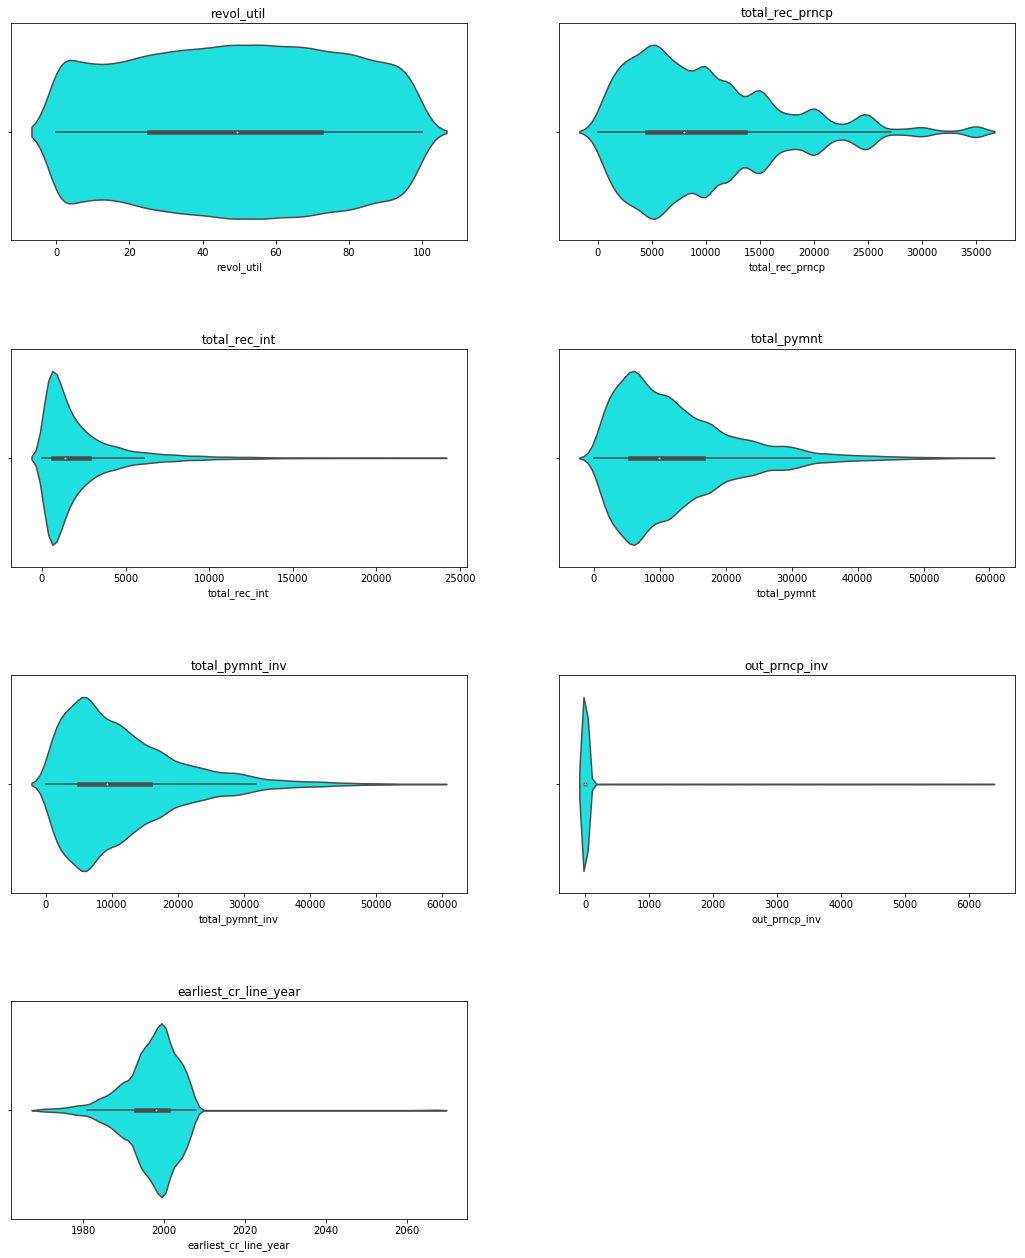

In [55]:
plt.figure(figsize=(18, 22))
plt.subplots_adjust(hspace=0.5)

# Subplot 1: revol_util
plt.subplot(4, 2, 1)
plt.title('revol_util')
sns.violinplot(loans['revol_util'], color = 'cyan')

# Subplot 2: total_rec_prncp
plt.subplot(4, 2, 2)
plt.title('total_rec_prncp')
sns.violinplot(loans['total_rec_prncp'], color = 'cyan')

# Subplot 3: total_rec_int
plt.subplot(4, 2, 3)
plt.title('total_rec_int')
sns.violinplot(loans['total_rec_int'], color = 'cyan')

# Subplot 4: total_pymnt
plt.subplot(4, 2, 4)
plt.title('total_pymnt')
sns.violinplot(loans['total_pymnt'], color = 'cyan')

# Subplot 5: total_pymnt
plt.subplot(4, 2, 5)
plt.title('total_pymnt_inv')
sns.violinplot(loans['total_pymnt_inv'], color = 'cyan')

# Subplot 6: out_prncp_inv
plt.subplot(4, 2, 6)
plt.title('out_prncp_inv')
sns.violinplot(loans['out_prncp_inv'], color = 'cyan')

# Subplot 7: earliest_cr_line_year
plt.subplot(4, 2, 7)
plt.title('earliest_cr_line_year')
sns.violinplot(loans['earliest_cr_line_year'], color = 'cyan')

plt.show()

### ??? Graphs

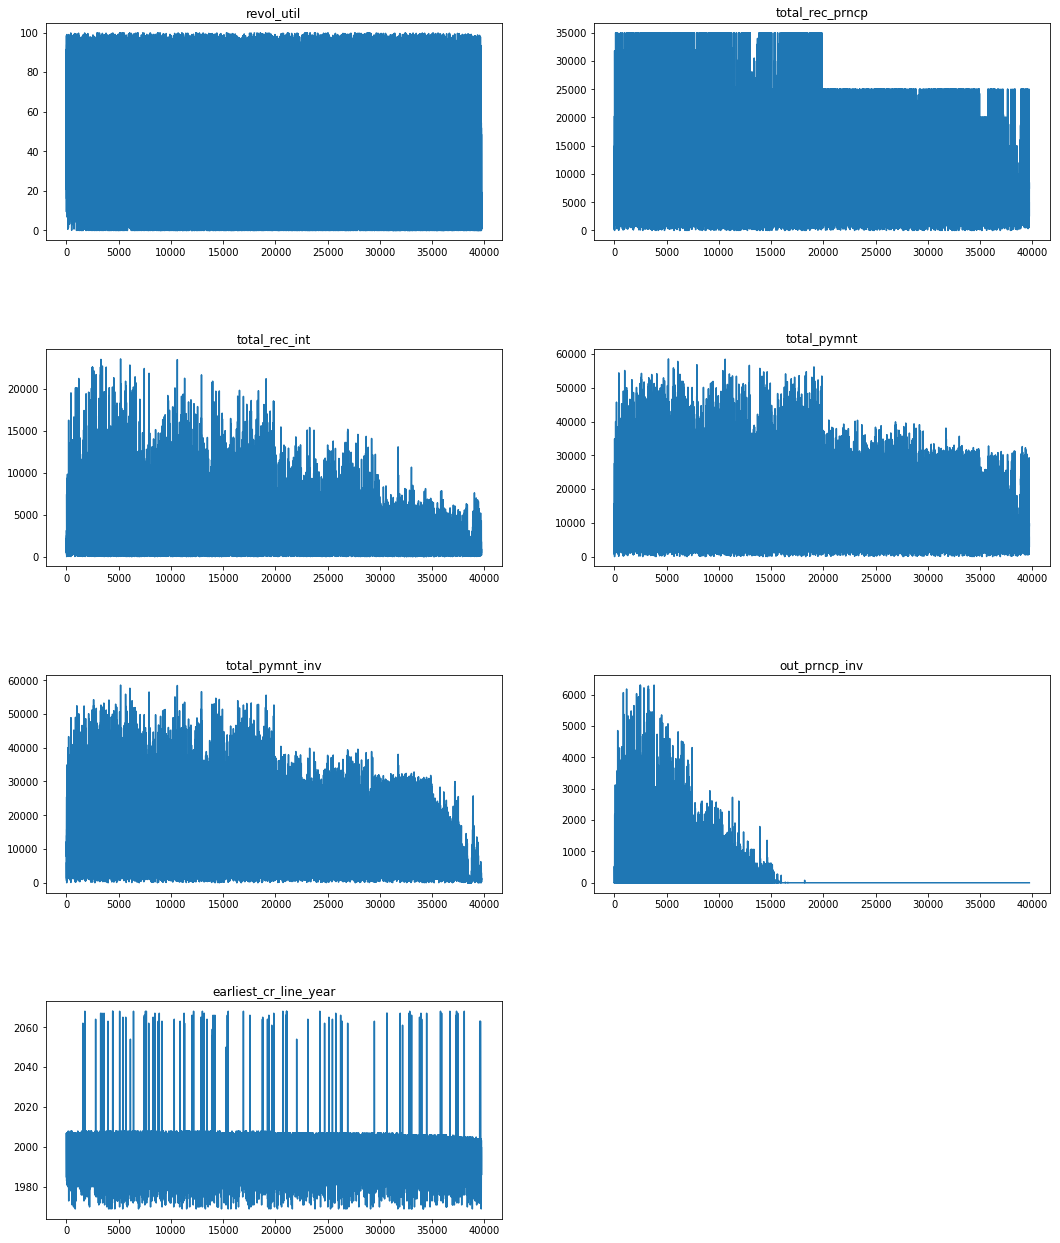

In [56]:
plt.figure(figsize=(18, 22))
plt.subplots_adjust(hspace=0.5)

# Subplot 1: revol_util
plt.subplot(4, 2, 1)
plt.title('revol_util')
loans['revol_util'].plot.line()

# Subplot 2: total_rec_prncp
plt.subplot(4, 2, 2)
plt.title('total_rec_prncp')
loans['total_rec_prncp'].plot.line()

# Subplot 3: total_rec_int
plt.subplot(4, 2, 3)
plt.title('total_rec_int')
loans['total_rec_int'].plot.line()

# Subplot 4: total_pymnt
plt.subplot(4, 2, 4)
plt.title('total_pymnt')
loans['total_pymnt'].plot.line()

# Subplot 5: total_pymnt
plt.subplot(4, 2, 5)
plt.title('total_pymnt_inv')
loans['total_pymnt_inv'].plot.line()

# Subplot 6: out_prncp_inv
plt.subplot(4, 2, 6)
plt.title('out_prncp_inv')
loans['out_prncp_inv'].plot.line()

# Subplot 7: earliest_cr_line_year
plt.subplot(4, 2, 7)
plt.title('earliest_cr_line_year')
loans['earliest_cr_line_year'].plot.line()

plt.show()

### addr_state column

In [247]:
loans['addr_state'].isnull().sum()

0

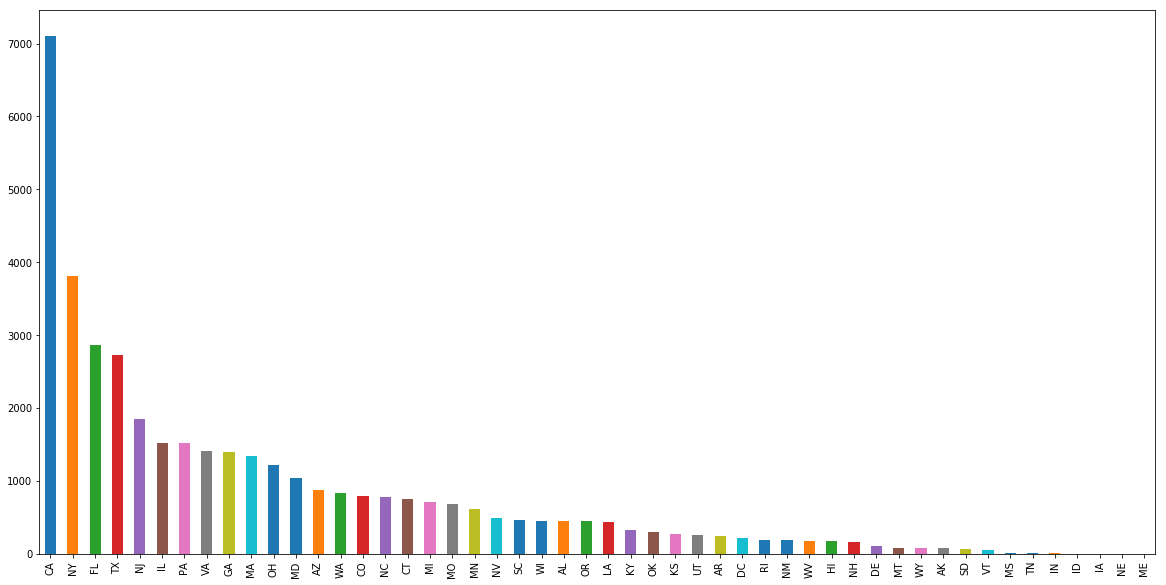

In [249]:
# Plot which states received more no. of loan applications
plt.figure(figsize=(20, 10))
loans['addr_state'].value_counts().plot.bar()
plt.show()

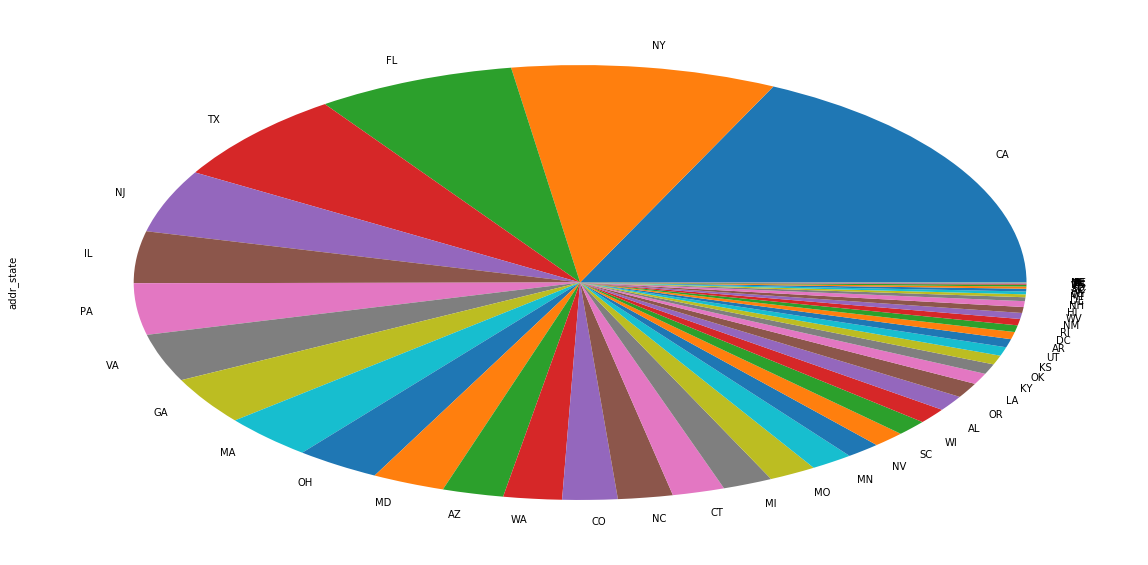

In [250]:
# Plot which states received more no. of loan applications
plt.figure(figsize=(20, 10))
loans['addr_state'].value_counts().plot.pie()
plt.show()

### zip_code column

In [299]:
loans['zip_code'].isnull().sum()

0

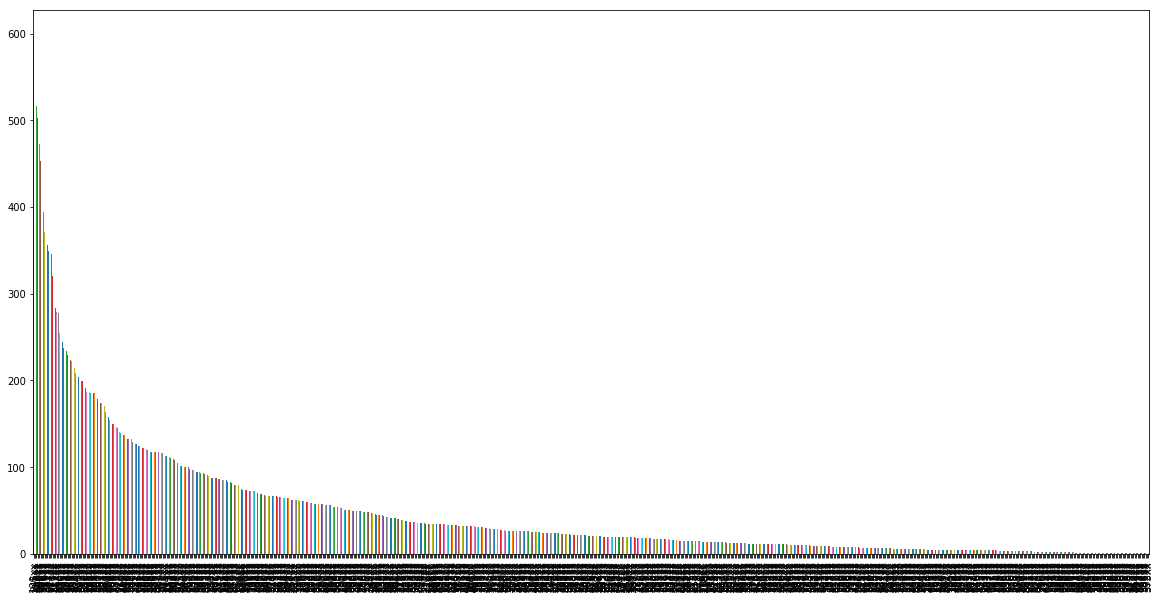

In [301]:
plt.figure(figsize=(20, 10))
loans['zip_code'].value_counts().plot.bar()
plt.show()

In [37]:
# Above should be plotted after grouping by addr_state

# Observations
- total_pymnt_inv and total_pymnt are very similar. __One of them may be redundant__
- out_prncp_inv - because of around 400-500 outliers, the total graph is skewed. __May be we can remove them__
- acc_now_delinq, delinq_amnt has only '0' as their values. __Can be dropped__
- application_type has only 'INDIVIDUAL' as its values. __Can be dropped__
- chargeoff_within_12_mths has '0' values and 56 'nan' values. __Can be dropped__